In [7]:
from scipy import interpolate
import numpy as np

In [8]:
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(x, y, z, kind='cubic')

In [9]:
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
znew = f(xnew, ynew)


In [10]:
znew.shape

(1002, 1002)

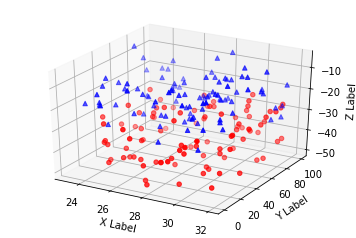

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [15]:
xs.shape

(100,)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp2d, RectBivariateSpline


from functions import read_input_data, utility
from constants import *

In [2]:
results_dir_path = '/Users/Quintus/Google Drive/Dynamic Programming/code/results/'
c_func_fp = os.path.join(results_dir_path, 'c_func.pkl')
p_func_fp = os.path.join(results_dir_path, 'p_func.pkl')
v_func_fp = os.path.join(results_dir_path, 'v_func.pkl')


### Consumption Functions

In [6]:
with open(c_func_fp, 'rb') as f:
    c = pickle.load(f)

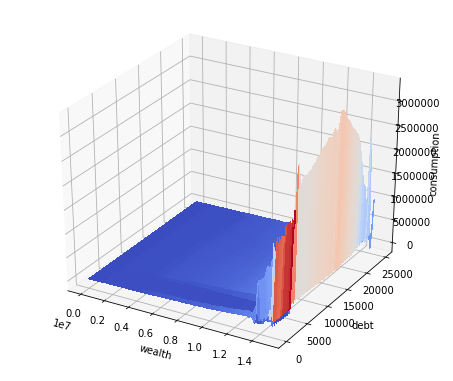

In [88]:
grid_w = np.linspace(LOWER_BOUND_W, UPPER_BOUND_W, N_W)
grid_d = np.linspace(LOWER_BOUND_D, UPPER_BOUND_D, N_D)

spline = RectBivariateSpline(grid_w, grid_d, c[20].T)

sample_w = np.arange(1, UPPER_BOUND_W, 1000)
sample_d = np.arange(1, UPPER_BOUND_D, 100)


fig = plt.figure(figsize=(6,5))
ax = Axes3D(fig)
w, d = np.meshgrid(sample_w, sample_d)
ax.plot_surface(w, d, spline(sample_w, sample_d).T, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_xlabel('wealth')
ax.set_ylabel('debt')
ax.set_zlabel('consumption')
plt.show()

In [52]:
w.shape

(250, 15000)

In [55]:
d.shape

(250, 15000)

In [86]:
spline(sample_w, sample_d).T.shape

(250, 15000)

### Repayment Functions

In [3]:
with open(p_func_fp, 'rb') as f:
    p = pickle.load(f)

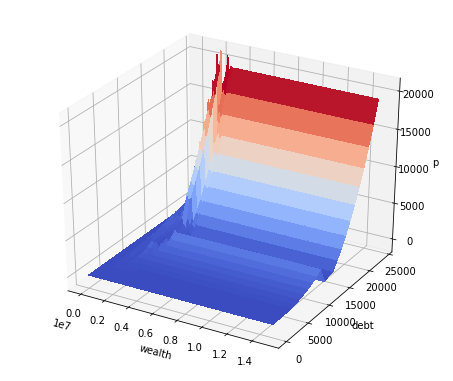

In [97]:
grid_w = np.linspace(LOWER_BOUND_W, UPPER_BOUND_W, N_W)
grid_d = np.linspace(LOWER_BOUND_D, UPPER_BOUND_D, N_D)

spline = RectBivariateSpline(grid_w, grid_d, p[76].T)

sample_w = np.arange(1, UPPER_BOUND_W, 10000)
sample_d = np.arange(1, UPPER_BOUND_D, 1000)


fig = plt.figure(figsize=(6,5))
ax = Axes3D(fig)
w, d = np.meshgrid(sample_w, sample_d)
ax.plot_surface(w, d, spline(sample_w, sample_d).T, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_xlabel('wealth')
ax.set_ylabel('debt')
ax.set_zlabel('p')
plt.show()

In [5]:
(p < 0).sum()

0